In [1]:
import tensorflow as tf
import numpy as np
from glob import glob
from matplotlib import pyplot as plt

In [2]:
# Load the Ising data from text files
ordered_files = glob('Under Tc/*.txt')
disordered_files = glob('Above Tc/*.txt')

data = []
for file in ordered_files:
    data.append(np.loadtxt(file).reshape((20, 20)))
for file in disordered_files:
    data.append(np.loadtxt(file).reshape((20, 20)))

labels = np.concatenate((np.ones(len(ordered_files)), np.zeros(len(disordered_files))))

In [3]:
# Wrap data in a numpy array so that model.fit doesn't have problems
np_data = np.array(data)

In [4]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(20,20,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 18, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 9, 32)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 64)                3

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
history = model.fit(np_data, labels, epochs=10, validation_split=0.2)

Epoch 1/10
1025/1025 [==============================] - 12s 3ms/step - loss: 0.1822 - accuracy: 0.9209 - val_loss: 0.1545 - val_accuracy: 0.9433
Epoch 2/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.1142 - accuracy: 0.9550 - val_loss: 0.0273 - val_accuracy: 0.9915
Epoch 3/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.1045 - accuracy: 0.9595 - val_loss: 0.0390 - val_accuracy: 0.9885
Epoch 4/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.0991 - accuracy: 0.9612 - val_loss: 0.0228 - val_accuracy: 0.9934
Epoch 5/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.0933 - accuracy: 0.9627 - val_loss: 0.1144 - val_accuracy: 0.9588
Epoch 6/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.0904 - accuracy: 0.9654 - val_loss: 0.1010 - val_accuracy: 0.9622
Epoch 7/10
1025/1025 [==============================] - 3s 3ms/step - loss: 0.0830 - accuracy: 0.9680 - val_loss: 0.0744 - val_accuracy

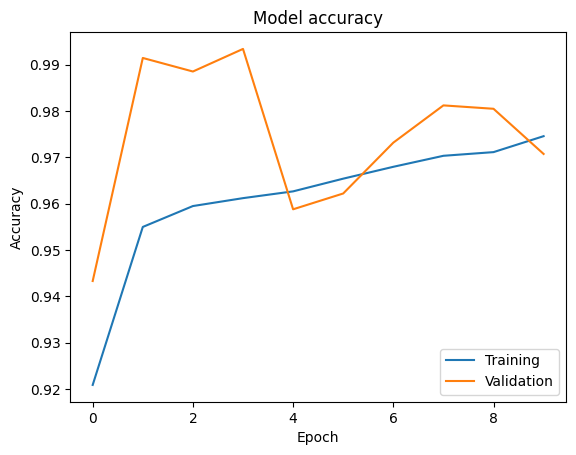

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

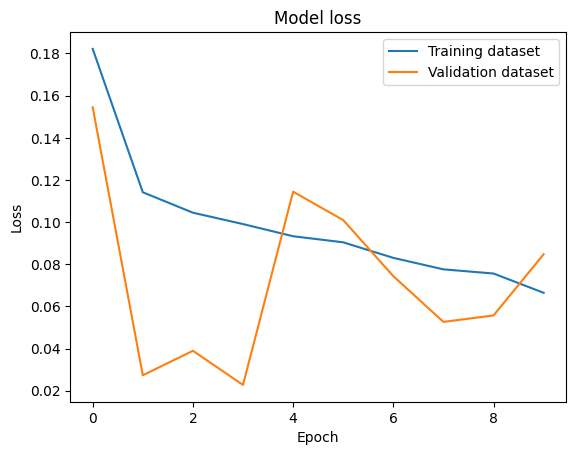

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training dataset', 'Validation dataset'], loc='upper right')
plt.show()

In [9]:
# Test the model
test_ordered_files = glob('Under Tc test/*.txt')
test_disordered_files = glob('Above Tc test/*.txt')

test_data = []
for file in test_ordered_files:
    test_data.append(np.loadtxt(file).reshape((20, 20)))
for file in test_disordered_files:
    test_data.append(np.loadtxt(file).reshape((20, 20)))

np_test_data = np.array(test_data)
    
test_labels = np.concatenate((np.ones(len(test_ordered_files)), np.zeros(len(test_disordered_files))))

test_loss, test_acc = model.evaluate(np_test_data, test_labels, batch_size=10)
print('Test accuracy:', test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 1.0000
Test accuracy: 1.0


In [10]:
# Test the model close to Tc
close_test_ordered_files = glob('Under Tc close test/*.txt')
close_test_disordered_files = glob('Above Tc close test/*.txt')

close_test_data = []
for file in close_test_ordered_files:
    close_test_data.append(np.loadtxt(file).reshape((20, 20)))
for file in close_test_disordered_files:
    close_test_data.append(np.loadtxt(file).reshape((20, 20)))

np_close_test_data = np.array(close_test_data)
    
close_test_labels = np.concatenate((np.ones(len(close_test_ordered_files)), np.zeros(len(close_test_disordered_files))))

close_test_loss, close_test_acc = model.evaluate(np_close_test_data, close_test_labels, batch_size=10)
print('Test accuracy:', close_test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.7600
Test accuracy: 0.7599999904632568
